<a href="https://colab.research.google.com/github/ludawg44/jigsawlabs/blob/master/16May20_0_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning In Sklearn

### Introduction

Now that we have learned about the hypothesis function, training procedure, and cost function for decision trees, let's move onto using them with the sklearn library.

### 1. Gather the data

We can start by gathering our customer data.

In [0]:
import pandas as pd
url = "https://raw.githubusercontent.com/jigsawlabs-student/decision-trees-intro/master/3-practical-ds-4/customer_data.csv"
df = pd.read_csv(url)
df

attended_college under_thirty    borough    income  customer
0                ?          Yes  Manhattan      < 55         0
1              Yes          Yes   Brooklyn      < 55         0
2                ?           No   Brooklyn      < 55         1
3               No           No     Queens     > 100         1
4                ?           No     Queens  55 - 100         1
5              Yes           No  Manhattan     > 100         0
6              Yes           No     Queens     > 100         0
7              Yes          Yes   Brooklyn  55 - 100         0

Now to feed the data above into a decision tree model, we need to convert every value above into a number.  We can do so with the labelencoder from sklearn.

In [0]:
from sklearn.preprocessing import LabelEncoder 
from sklearn_pandas import DataFrameMapper
mapper = DataFrameMapper([
 (['attended_college'], LabelEncoder()), 
 (['under_thirty'], LabelEncoder()), 
 (['borough'], LabelEncoder()), 
 (['income'], LabelEncoder()), 
], df_out = True)


X = mapper.fit_transform(df)
X

attended_college  under_thirty  borough  income
0                 0             1        1       1
1                 2             1        0       1
2                 0             0        0       1
3                 1             0        2       2
4                 0             0        2       0
5                 2             0        1       2
6                 2             0        2       2
7                 2             1        0       0

The data in `X` *may not look like* our original training data, but it is equivalent.  We got to the data in `X` by starting with our original data that had values as text, and then assigning a different number to each unique value in a column. 

> **For example,** for the `attended_college` column, `?` is represented by a `0`, and `Yes` is represented by a `2`.

| Attended College | Under Thirty | Borough   | Income | Customer |
| ---------------- | ------------ | --------- | ------ | :------: |
| ?                | Yes          | Manhattan | < 55   |    0     |
| Yes              | Yes          | Brooklyn  | < 55   |    0     |
| ?                | No           | Brooklyn  | < 55   |    1     |

So we have prepared our data by translating all of our feature values into a corresponding number.

Now let's assign the Customer column to equal `y`.

In [0]:
y = df['customer']
y

0    0
1    0
2    1
3    1
4    1
5    0
6    0
7    0
Name: customer, dtype: int64

### 2. Train a Model

Ok, now that we have our feature data and target data separated, and all of our values represented as a number, we can move into training.  

To do so, we'll use the `sklearn` library.  We start by telling Jupyter to use the `sklearn.tree` module's `DecisionTreeClasifier`.  

In [0]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

That it!  We just trained a machine learning model in `sklearn`.  Our hypothesis function is now in there, but it will take a couple of lines of code to see it.

### 3. Use the Hypothesis Function

Now that we have created and trained our model, we can view the hypothesis function of our decision tree above.  But unfortunately, we need another library to do so.  

> Run the cell below to install the `dtreeviz` library into your notebook environment.  There may be a lot of output after running the cell below.  Just scroll down.

In [0]:
!pip install dtreeviz

Afterwards, we can visualize our decision tree by pressing `shift + return` on the cell below.  

> For now, let's not worry too much about how the code below works, but if you take a look at it, it's not so bad.

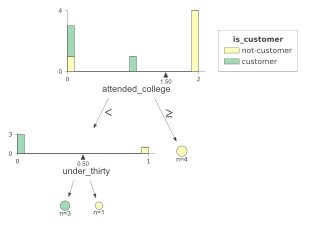

In [0]:
from dtreeviz.trees import dtreeviz
viz_1 = dtreeviz(model,
               X.to_numpy(),
               y.values,
               target_name='is_customer',
               feature_names=X.columns,
               class_names=['not-customer', 'customer']
              )
              
viz_1   

So we can see that our model's hypothesis function makes predictions based on an observation's feature of `attended_college`.  

If there is not a ? for whether the lead attended college, which remember is the 0, then the model predicts she is not a customer.  Otherwise it goes to the next split to see if the lead is under 30, if a ? and not under thirty it predicts a customer, otherwise it predicts not a customer.

### Predicting with the model

Now the power of our trained model is that we can now, take in the features of a lead where we do not know the outcome, and predict if she will become a customer or not.  

Before we do that, let's check that our model properly predicts the outcomes of the training data.

In [0]:
y

0    0
1    0
2    1
3    1
4    1
5    0
6    0
7    0
Name: customer, dtype: int64

In [0]:
model.predict(X)

array([0, 0, 1, 1, 1, 0, 0, 0])

Ok, now let's use the model to predict the outcome of a lead where we do not know the outcome.

| Attended College | Under Thirty | Borough   | Income | 
| ---------------- | ------------ | --------- | ------ | 
| ?                | No          | Brooklyn | < 55   | 

In [0]:
import numpy as np
df_2 = pd.DataFrame([['?', 'No', 'Brooklyn', '< 55']], columns = df.columns[:-1])
df_2

attended_college under_thirty   borough income
0                ?           No  Brooklyn   < 55

In [0]:
obs = mapper.transform(df_2)
obs

attended_college  under_thirty  borough  income
0                 0             0        0       1

And then we can pass this into the model's predict method.

In [0]:
model.predict(obs)

array([1])

> `model.predict` takes a *list* of observations as an argument.

Above, because the lead is not under 30, our model predicts the lead will become a customer.

### Summary

In this lesson, we saw how we can train and predict with a decision tree classifier.  Doing so involves first converting our data to be numerical.  Here, we used the LabelEncoder transformer to convert each category into an assigned number.  Then, we initialized a DecisionTreeClassifier, fitting with our feature and target variables.  It's tricky to see the hypothesis function, but we can do so using `dtreeviz`.

Finally, we can predict the outcomes of new observations by transforming the observations with our mapper and then with the `predict` method.

<center>
<a href="https://www.jigsawlabs.io/free" style="position: center"><img src="https://storage.cloud.google.com/curriculum-assets/curriculum-assets.nosync/mom-files/jigsaw-labs.png" width="15%" style="text-align: center"></a>
</center>